<a href="https://colab.research.google.com/github/vishnuvryeruva/Data-Augmentation--Activation-functions--Regularization/blob/main/Activation_Functions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sys
assert sys.version_info >= (3, 5)
import sklearn
assert sklearn.__version__ >= "0.20"

import numpy as np
import os

np.random.seed(42)


%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

PROJECT_ROOT_DIR = "."
CHAPTER_ID = "deep"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [2]:
import tensorflow as tf
from tensorflow import keras
[name for name in dir(keras.initializers) if not name.startswith("_")]

['Constant',
 'GlorotNormal',
 'GlorotUniform',
 'HeNormal',
 'HeUniform',
 'Identity',
 'Initializer',
 'LecunNormal',
 'LecunUniform',
 'Ones',
 'Orthogonal',
 'RandomNormal',
 'RandomUniform',
 'TruncatedNormal',
 'VarianceScaling',
 'Zeros',
 'constant',
 'deserialize',
 'get',
 'glorot_normal',
 'glorot_uniform',
 'he_normal',
 'he_uniform',
 'identity',
 'lecun_normal',
 'lecun_uniform',
 'ones',
 'orthogonal',
 'random_normal',
 'random_uniform',
 'serialize',
 'truncated_normal',
 'variance_scaling',
 'zeros']

In [3]:
keras.layers.Dense(20, activation="relu", kernel_initializer="he_normal")

Leaky RELU

In [4]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0 # Scaling the data 
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

4431872/4422102 [==============================] - 0s 0us/step


In [5]:
tf.random.set_seed(42)
np.random.seed(42)
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(100, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(10, activation="softmax")
])

In [6]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [7]:
history = model.fit(X_train, y_train, epochs=15,
                    validation_data=(X_valid, y_valid))

Epoch 1/15
1719/1719 [==============================] - 9s 5ms/step - loss: 1.2819 - accuracy: 0.6229 - val_loss: 0.8886 - val_accuracy: 0.7160
Epoch 2/15
1719/1719 [==============================] - 7s 4ms/step - loss: 0.7955 - accuracy: 0.7361 - val_loss: 0.7130 - val_accuracy: 0.7656
Epoch 3/15
1719/1719 [==============================] - 6s 4ms/step - loss: 0.6816 - accuracy: 0.7721 - val_loss: 0.6427 - val_accuracy: 0.7900
Epoch 4/15
1719/1719 [==============================] - 7s 4ms/step - loss: 0.6217 - accuracy: 0.7944 - val_loss: 0.5900 - val_accuracy: 0.8064
Epoch 5/15
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5832 - accuracy: 0.8074 - val_loss: 0.5582 - val_accuracy: 0.8200
Epoch 6/15
1719/1719 [==============================] - 8s 4ms/step - loss: 0.5553 - accuracy: 0.8156 - val_loss: 0.5350 - val_accuracy: 0.8238
Epoch 7/15
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5339 - accuracy: 0.8223 - val_loss: 0.5156 - val_accuracy:

PRELU

In [8]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [9]:
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer="he_normal"),
    keras.layers.PReLU(),
    keras.layers.Dense(100, kernel_initializer="he_normal"),
    keras.layers.PReLU(),
    keras.layers.Dense(10, activation="softmax")
])

In [10]:
tf.random.set_seed(42)
np.random.seed(42)
# Creating the sequential model and adding different layers 
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer="he_normal"),
    keras.layers.PReLU(),
    keras.layers.Dense(100, kernel_initializer="he_normal"),
    keras.layers.PReLU(),
    keras.layers.Dense(10, activation="softmax")
])

In [11]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [12]:
history = model.fit(X_train, y_train, epochs=15,
                    validation_data=(X_valid, y_valid))

Epoch 1/15
1719/1719 [==============================] - 8s 4ms/step - loss: 1.3461 - accuracy: 0.6209 - val_loss: 0.9255 - val_accuracy: 0.7186
Epoch 2/15
1719/1719 [==============================] - 7s 4ms/step - loss: 0.8197 - accuracy: 0.7355 - val_loss: 0.7305 - val_accuracy: 0.7628
Epoch 3/15
1719/1719 [==============================] - 7s 4ms/step - loss: 0.6966 - accuracy: 0.7694 - val_loss: 0.6565 - val_accuracy: 0.7878
Epoch 4/15
1719/1719 [==============================] - 7s 4ms/step - loss: 0.6331 - accuracy: 0.7909 - val_loss: 0.6003 - val_accuracy: 0.8046
Epoch 5/15
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5917 - accuracy: 0.8057 - val_loss: 0.5656 - val_accuracy: 0.8180
Epoch 6/15
1719/1719 [==============================] - 8s 4ms/step - loss: 0.5618 - accuracy: 0.8134 - val_loss: 0.5406 - val_accuracy: 0.8238
Epoch 7/15
1719/1719 [==============================] - 8s 4ms/step - loss: 0.5390 - accuracy: 0.8205 - val_loss: 0.5196 - val_accuracy:

SELU

In [13]:
np.random.seed(42)
tf.random.set_seed(42)

In [14]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="selu",
                             kernel_initializer="lecun_normal"))
for layer in range(50):
    model.add(keras.layers.Dense(100, activation="selu",
                                 kernel_initializer="lecun_normal"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [15]:
pixel_means = X_train.mean(axis=0, keepdims=True)
pixel_stds = X_train.std(axis=0, keepdims=True)
X_train_scaled = (X_train - pixel_means) / pixel_stds
X_valid_scaled = (X_valid - pixel_means) / pixel_stds
X_test_scaled = (X_test - pixel_means) / pixel_stds

In [16]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [17]:
history = model.fit(X_train_scaled, y_train, epochs=15,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/15
1719/1719 [==============================] - 22s 12ms/step - loss: 0.7413 - accuracy: 0.7408 - val_loss: 0.5305 - val_accuracy: 0.8132
Epoch 2/15
1719/1719 [==============================] - 21s 12ms/step - loss: 0.4982 - accuracy: 0.8238 - val_loss: 0.4604 - val_accuracy: 0.8372
Epoch 3/15
1719/1719 [==============================] - 19s 11ms/step - loss: 0.4392 - accuracy: 0.8439 - val_loss: 0.4341 - val_accuracy: 0.8420
Epoch 4/15
1719/1719 [==============================] - 19s 11ms/step - loss: 0.4004 - accuracy: 0.8567 - val_loss: 0.4036 - val_accuracy: 0.8546
Epoch 5/15
1719/1719 [==============================] - 19s 11ms/step - loss: 0.3744 - accuracy: 0.8657 - val_loss: 0.3839 - val_accuracy: 0.8608
Epoch 6/15
1719/1719 [==============================] - 19s 11ms/step - loss: 0.3530 - accuracy: 0.8721 - val_loss: 0.3949 - val_accuracy: 0.8620
Epoch 7/15
1719/1719 [==============================] - 22s 13ms/step - loss: 0.3344 - accuracy: 0.8790 - val_loss: 0.3716 -

Batch Normalization

It is a process to make neural networks faster and more stable through adding extra layers in a deep neural network. It also is responsible for reducing the number of epochs required to train the model

In [18]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dense(100, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [19]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [20]:
history = model.fit(X_train, y_train, epochs=15,
                    validation_data=(X_valid, y_valid))

Epoch 1/15
1719/1719 [==============================] - 16s 9ms/step - loss: 0.9993 - accuracy: 0.6835 - val_loss: 0.6604 - val_accuracy: 0.7914
Epoch 2/15
1719/1719 [==============================] - 11s 7ms/step - loss: 0.6693 - accuracy: 0.7833 - val_loss: 0.5487 - val_accuracy: 0.8216
Epoch 3/15
1719/1719 [==============================] - 10s 6ms/step - loss: 0.5903 - accuracy: 0.8038 - val_loss: 0.4964 - val_accuracy: 0.8388
Epoch 4/15
1719/1719 [==============================] - 11s 6ms/step - loss: 0.5412 - accuracy: 0.8177 - val_loss: 0.4639 - val_accuracy: 0.8430
Epoch 5/15
1719/1719 [==============================] - 12s 7ms/step - loss: 0.5083 - accuracy: 0.8268 - val_loss: 0.4423 - val_accuracy: 0.8516
Epoch 6/15
1719/1719 [==============================] - 12s 7ms/step - loss: 0.4868 - accuracy: 0.8335 - val_loss: 0.4254 - val_accuracy: 0.8556
Epoch 7/15
1719/1719 [==============================] - 11s 6ms/step - loss: 0.4694 - accuracy: 0.8397 - val_loss: 0.4115 - val_ac

Gradient Clipping

In [21]:
optimizer = keras.optimizers.SGD(clipvalue=1.0)

In [22]:
optimizer = keras.optimizers.SGD(clipnorm=1.0)

In [23]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dense(100, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [24]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3,clipvalue=1.0),
              metrics=["accuracy"])

In [25]:
history = model.fit(X_train, y_train, epochs=15,
                    validation_data=(X_valid, y_valid))

Epoch 1/15
1719/1719 [==============================] - 12s 6ms/step - loss: 1.0326 - accuracy: 0.6746 - val_loss: 0.6582 - val_accuracy: 0.7900
Epoch 2/15
1719/1719 [==============================] - 10s 6ms/step - loss: 0.6592 - accuracy: 0.7863 - val_loss: 0.5429 - val_accuracy: 0.8202
Epoch 3/15
1719/1719 [==============================] - 11s 6ms/step - loss: 0.5817 - accuracy: 0.8064 - val_loss: 0.4910 - val_accuracy: 0.8364
Epoch 4/15
1719/1719 [==============================] - 11s 6ms/step - loss: 0.5321 - accuracy: 0.8200 - val_loss: 0.4576 - val_accuracy: 0.8454
Epoch 5/15
1719/1719 [==============================] - 11s 6ms/step - loss: 0.4999 - accuracy: 0.8289 - val_loss: 0.4368 - val_accuracy: 0.8512
Epoch 6/15
1719/1719 [==============================] - 12s 7ms/step - loss: 0.4789 - accuracy: 0.8356 - val_loss: 0.4205 - val_accuracy: 0.8556
Epoch 7/15
1719/1719 [==============================] - 12s 7ms/step - loss: 0.4629 - accuracy: 0.8407 - val_loss: 0.4075 - val_ac

Optimizers

In [26]:
optimizer = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

In [27]:
optimizer = keras.optimizers.Nadam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

In [28]:
optimizer = keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9)

In [29]:
optimizer = keras.optimizers.Adamax(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

Learning Rate Scheduling

In [30]:
optimizer = keras.optimizers.SGD(learning_rate=0.01, decay=1e-4)

In [31]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [32]:
n_epochs = 30
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4917 - accuracy: 0.8255 - val_loss: 0.4083 - val_accuracy: 0.8570
Epoch 2/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3815 - accuracy: 0.8649 - val_loss: 0.3746 - val_accuracy: 0.8696
Epoch 3/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3479 - accuracy: 0.8768 - val_loss: 0.3811 - val_accuracy: 0.8690
Epoch 4/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3270 - accuracy: 0.8833 - val_loss: 0.3541 - val_accuracy: 0.8704
Epoch 5/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3120 - accuracy: 0.8889 - val_loss: 0.3484 - val_accuracy: 0.8738
Epoch 6/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2983 - accuracy: 0.8943 - val_loss: 0.3468 - val_accuracy: 0.8798
Epoch 7/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2885 - accuracy: 0.8972 - val_loss: 0.3400 - val_accuracy:

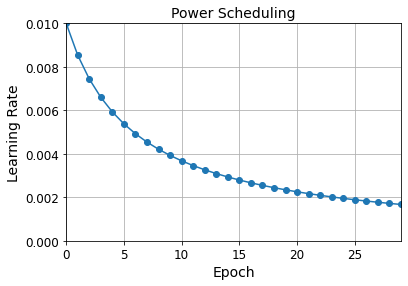

In [33]:
import math

learning_rate = 0.01
decay = 1e-4
batch_size = 32
n_steps_per_epoch = math.ceil(len(X_train) / batch_size)
epochs = np.arange(n_epochs)
lrs = learning_rate / (1 + decay * epochs * n_steps_per_epoch)

plt.plot(epochs, lrs,  "o-")
plt.axis([0, n_epochs - 1, 0, 0.01])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Power Scheduling", fontsize=14)
plt.grid(True)
plt.show()

Piecewise constant scheduling

The function returns a 1-arg callable to compute the piecewise constant when passed the current optimizer step. This can be useful for changing the learning rate value across different invocations of optimizer functions.

In [34]:
def piecewise_constant_fn(epoch):
    if epoch < 5:
        return 0.01
    elif epoch < 15:
        return 0.005
    else:
        return 0.001

In [35]:
def piecewise_constant(boundaries, values):
    boundaries = np.array([0] + boundaries)
    values = np.array(values)
    def piecewise_constant_fn(epoch):
        return values[np.argmax(boundaries > epoch) - 1]
    return piecewise_constant_fn

piecewise_constant_fn = piecewise_constant([5, 15], [0.01, 0.005, 0.001])

In [36]:
lr_scheduler = keras.callbacks.LearningRateScheduler(piecewise_constant_fn)
##Train the model at 30 Epochs and see the result
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 30
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[lr_scheduler])

Epoch 1/30
1719/1719 [==============================] - 13s 7ms/step - loss: 0.8729 - accuracy: 0.7496 - val_loss: 0.9312 - val_accuracy: 0.7320 - lr: 0.0100
Epoch 2/30
1719/1719 [==============================] - 12s 7ms/step - loss: 0.8370 - accuracy: 0.7500 - val_loss: 0.9902 - val_accuracy: 0.6972 - lr: 0.0100
Epoch 3/30
1719/1719 [==============================] - 12s 7ms/step - loss: 1.0856 - accuracy: 0.6746 - val_loss: 1.3574 - val_accuracy: 0.6224 - lr: 0.0100
Epoch 4/30
1719/1719 [==============================] - 12s 7ms/step - loss: 0.9621 - accuracy: 0.6750 - val_loss: 1.0658 - val_accuracy: 0.6384 - lr: 0.0100
Epoch 5/30
1719/1719 [==============================] - 12s 7ms/step - loss: 0.8885 - accuracy: 0.6945 - val_loss: 0.8539 - val_accuracy: 0.7140 - lr: 0.0100
Epoch 6/30
1719/1719 [==============================] - 12s 7ms/step - loss: 0.6867 - accuracy: 0.7283 - val_loss: 0.8049 - val_accuracy: 0.7462 - lr: 0.0050
Epoch 7/30
1719/1719 [==============================

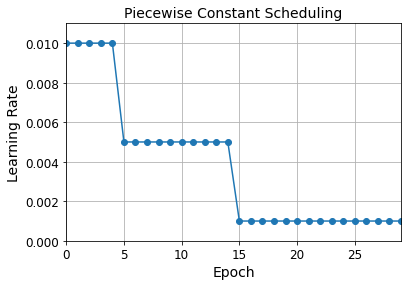

In [37]:
plt.plot(history.epoch, [piecewise_constant_fn(epoch) for epoch in history.epoch], "o-")
plt.axis([0, n_epochs - 1, 0, 0.011])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Piecewise Constant Scheduling", fontsize=14)
plt.grid(True)
plt.show()

Performance Scheduling

In [38]:
tf.random.set_seed(42)
np.random.seed(42)

In [39]:
lr_scheduler = keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=5)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
optimizer = keras.optimizers.SGD(learning_rate=0.02, momentum=0.9)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
n_epochs = 30
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[lr_scheduler])

Epoch 1/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5908 - accuracy: 0.8070 - val_loss: 0.4863 - val_accuracy: 0.8474 - lr: 0.0200
Epoch 2/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4939 - accuracy: 0.8393 - val_loss: 0.6034 - val_accuracy: 0.8374 - lr: 0.0200
Epoch 3/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5016 - accuracy: 0.8439 - val_loss: 0.4986 - val_accuracy: 0.8544 - lr: 0.0200
Epoch 4/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5030 - accuracy: 0.8486 - val_loss: 0.5206 - val_accuracy: 0.8588 - lr: 0.0200
Epoch 5/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5136 - accuracy: 0.8504 - val_loss: 0.4708 - val_accuracy: 0.8560 - lr: 0.0200
Epoch 6/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5028 - accuracy: 0.8559 - val_loss: 0.5840 - val_accuracy: 0.8518 - lr: 0.0200
Epoch 7/30
1719/1719 [==============================] - 7s

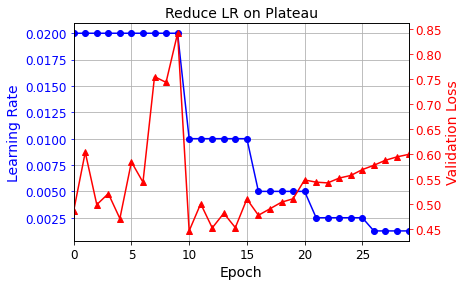

In [40]:
plt.plot(history.epoch, history.history["lr"], "bo-")
plt.xlabel("Epoch")
plt.ylabel("Learning Rate", color='b')
plt.tick_params('y', colors='b')
plt.gca().set_xlim(0, n_epochs - 1)
plt.grid(True)

ax2 = plt.gca().twinx()
ax2.plot(history.epoch, history.history["val_loss"], "r^-")
ax2.set_ylabel('Validation Loss', color='r')
ax2.tick_params('y', colors='r')

plt.title("Reduce LR on Plateau", fontsize=14)
plt.show()

Regularization

In [41]:
layer = keras.layers.Dense(100, activation="elu",
                           kernel_initializer="he_normal",
                           kernel_regularizer=keras.regularizers.l2(0.01))

In [42]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="elu",
                       kernel_initializer="he_normal",
                       kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dense(100, activation="elu",
                       kernel_initializer="he_normal",
                       kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dense(10, activation="softmax",
                       kernel_regularizer=keras.regularizers.l2(0.01))
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 10
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/10
1719/1719 [==============================] - 15s 8ms/step - loss: 1.5956 - accuracy: 0.8124 - val_loss: 0.7169 - val_accuracy: 0.8340
Epoch 2/10
1719/1719 [==============================] - 13s 8ms/step - loss: 0.7197 - accuracy: 0.8274 - val_loss: 0.6850 - val_accuracy: 0.8376
Epoch 3/10
1719/1719 [==============================] - 14s 8ms/step - loss: 0.7017 - accuracy: 0.8328 - val_loss: 0.6989 - val_accuracy: 0.8342
Epoch 4/10
1719/1719 [==============================] - 13s 8ms/step - loss: 0.6950 - accuracy: 0.8363 - val_loss: 0.6727 - val_accuracy: 0.8466
Epoch 5/10
1719/1719 [==============================] - 13s 8ms/step - loss: 0.6897 - accuracy: 0.8371 - val_loss: 0.6617 - val_accuracy: 0.8508
Epoch 6/10
1719/1719 [==============================] - 13s 7ms/step - loss: 0.6872 - accuracy: 0.8378 - val_loss: 0.6616 - val_accuracy: 0.8504
Epoch 7/10
1719/1719 [==============================] - 13s 8ms/step - loss: 0.6859 - accuracy: 0.8398 - val_loss: 0.6587 - val_ac

Dropout

In [43]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(300, activation="elu", kernel_initializer="he_normal"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(10, activation="softmax")
])  
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 20
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/20
1719/1719 [==============================] - 14s 7ms/step - loss: 0.5597 - accuracy: 0.8059 - val_loss: 0.3672 - val_accuracy: 0.8656
Epoch 2/20
1719/1719 [==============================] - 13s 7ms/step - loss: 0.4230 - accuracy: 0.8453 - val_loss: 0.3468 - val_accuracy: 0.8678
Epoch 3/20
1719/1719 [==============================] - 13s 7ms/step - loss: 0.3875 - accuracy: 0.8569 - val_loss: 0.3379 - val_accuracy: 0.8748
Epoch 4/20
1719/1719 [==============================] - 13s 7ms/step - loss: 0.3720 - accuracy: 0.8619 - val_loss: 0.3175 - val_accuracy: 0.8786
Epoch 5/20
1719/1719 [==============================] - 13s 7ms/step - loss: 0.3569 - accuracy: 0.8674 - val_loss: 0.3252 - val_accuracy: 0.8832
Epoch 6/20
1719/1719 [==============================] - 13s 7ms/step - loss: 0.3490 - accuracy: 0.8719 - val_loss: 0.3084 - val_accuracy: 0.8852
Epoch 7/20
1719/1719 [==============================] - 13s 8ms/step - loss: 0.3370 - accuracy: 0.8756 - val_loss: 0.3271 - val_ac

In [44]:
model.evaluate(X_test_scaled, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3306 - accuracy: 0.8829


[0.3305869996547699, 0.8828999996185303]

Alpha Dropout

In [45]:
tf.random.set_seed(100)
np.random.seed(100)

In [46]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.AlphaDropout(rate=0.2),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.AlphaDropout(rate=0.2),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.AlphaDropout(rate=0.2),
    keras.layers.Dense(10, activation="softmax")
])
optimizer = keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
n_epochs = 20
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/20
1719/1719 [==============================] - 9s 5ms/step - loss: 0.6651 - accuracy: 0.7589 - val_loss: 0.5744 - val_accuracy: 0.8442
Epoch 2/20
1719/1719 [==============================] - 8s 5ms/step - loss: 0.5536 - accuracy: 0.7975 - val_loss: 0.5074 - val_accuracy: 0.8458
Epoch 3/20
1719/1719 [==============================] - 8s 5ms/step - loss: 0.5257 - accuracy: 0.8071 - val_loss: 0.5568 - val_accuracy: 0.8382
Epoch 4/20
1719/1719 [==============================] - 8s 5ms/step - loss: 0.5107 - accuracy: 0.8116 - val_loss: 0.5097 - val_accuracy: 0.8464
Epoch 5/20
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4981 - accuracy: 0.8159 - val_loss: 0.4828 - val_accuracy: 0.8508
Epoch 6/20
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4804 - accuracy: 0.8233 - val_loss: 0.4818 - val_accuracy: 0.8626
Epoch 7/20
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4709 - accuracy: 0.8267 - val_loss: 0.4317 - val_accuracy:

In [47]:
model.evaluate(X_test_scaled, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.4543 - accuracy: 0.8697


[0.45431357622146606, 0.869700014591217]

Max Norm

In [48]:
layer = keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal",
                           kernel_constraint=keras.constraints.max_norm(1.))

In [49]:
from functools import partial
# Defining, compile and train thje model at 20 Epochs

MaxNormDense = partial(keras.layers.Dense,
                       activation="selu", kernel_initializer="lecun_normal",
                       kernel_constraint=keras.constraints.max_norm(1.))

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    MaxNormDense(300),
    MaxNormDense(100),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 20
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/20
1719/1719 [==============================] - 14s 7ms/step - loss: 0.4810 - accuracy: 0.8318 - val_loss: 0.3537 - val_accuracy: 0.8734
Epoch 2/20
1719/1719 [==============================] - 12s 7ms/step - loss: 0.3546 - accuracy: 0.8706 - val_loss: 0.3419 - val_accuracy: 0.8752
Epoch 3/20
1719/1719 [==============================] - 12s 7ms/step - loss: 0.3299 - accuracy: 0.8789 - val_loss: 0.3405 - val_accuracy: 0.8824
Epoch 4/20
1719/1719 [==============================] - 12s 7ms/step - loss: 0.3160 - accuracy: 0.8821 - val_loss: 0.3239 - val_accuracy: 0.8792
Epoch 5/20
1719/1719 [==============================] - 12s 7ms/step - loss: 0.3111 - accuracy: 0.8839 - val_loss: 0.3310 - val_accuracy: 0.8762
Epoch 6/20
1719/1719 [==============================] - 12s 7ms/step - loss: 0.3068 - accuracy: 0.8854 - val_loss: 0.3573 - val_accuracy: 0.8734
Epoch 7/20
1719/1719 [==============================] - 13s 7ms/step - loss: 0.3045 - accuracy: 0.8854 - val_loss: 0.3454 - val_ac

##**References**
https://github.com/ageron/handson-ml2/blob/master/11_training_deep_neural_networks.ipynb

https://colab.research.google.com/github/jfogarty/machine-learning-intro-workshop/blob/master/notebooks/nn_activation_functions.ipynb

https://colab.research.google.com/github/maticvl/dataHacker/blob/master/NN/NN_009_Activation_Functions_and_their_derivatives.ipynb